In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('cap_demand.csv')

In [3]:
df.head()

,Quarter,Demand
0,2021-01,142500
1,2021-02,98432
2,2021-03,93263
3,2021-04,128633
4,2021-05,83320


In [4]:
df.tail()

,Quarter,Demand
22,2022-11,127885
23,2022-12,97688
24,2023-01,119281
25,2023-02,121835
26,2023-03,120658


In [8]:
## Cleaning up the data
df.columns=["Quarter","Demand"]
df.head()

,Quarter,Demand
0,2021-01-01,142500
1,2021-02-01,98432
2,2021-03-01,93263
3,2021-04-01,128633
4,2021-05-01,83320


In [9]:
# Convert Month into Datetime
df['Quarter']=pd.to_datetime(df['Quarter'])

In [10]:
df.head()

,Quarter,Demand
0,2021-01-01,142500
1,2021-02-01,98432
2,2021-03-01,93263
3,2021-04-01,128633
4,2021-05-01,83320


In [11]:
df.set_index('Quarter',inplace=True)

In [12]:
df.head()

,Demand
Quarter,
2021-01-01,142500
2021-02-01,98432
2021-03-01,93263
2021-04-01,128633
2021-05-01,83320


In [13]:
df.describe()

,Demand
count,27.000000
mean,115744.000000
std,16241.075947
min,72210.000000
25%,106072.000000
50%,120658.000000
75%,126592.500000
max,142500.000000


<Axes: xlabel='Quarter'>

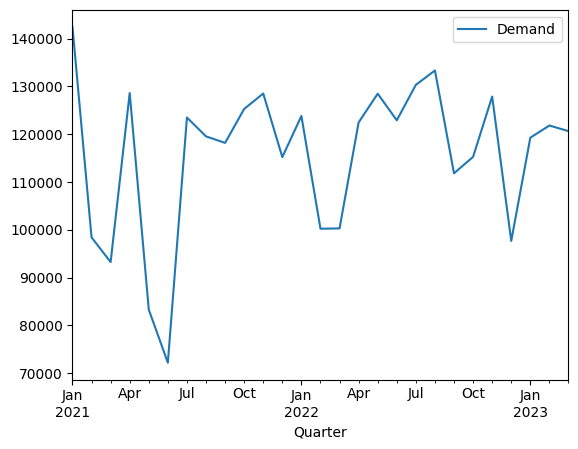

In [14]:
df.plot()

In [15]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [16]:
test_result=adfuller(df['Demand'])

In [17]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [18]:
adfuller_test(df['Demand'])

ADF Test Statistic : -2.360117816820044
p-value : 0.1533105967522005
#Lags Used : 9
Number of Observations Used : 17
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
df['Demand First Difference'] = df['Demand'] - df['Demand'].shift(1)

In [20]:
df['Demand'].shift(1)

Quarter
2021-01-01         NaN
2021-02-01    142500.0
2021-03-01     98432.0
2021-04-01     93263.0
2021-05-01    128633.0
2021-06-01     83320.0
2021-07-01     72210.0
2021-08-01    123502.0
2021-09-01    119560.0
2021-10-01    118200.0
2021-11-01    125300.0
2021-12-01    128524.0
2022-01-01    115224.0
2022-02-01    123827.0
2022-03-01    100245.0
2022-04-01    100309.0
2022-05-01    122476.0
2022-06-01    128493.0
2022-07-01    122924.0
2022-08-01    130340.0
2022-09-01    133346.0
2022-10-01    111835.0
2022-11-01    115278.0
2022-12-01    127885.0
2023-01-01     97688.0
2023-02-01    119281.0
2023-03-01    121835.0
Name: Demand, dtype: float64

In [21]:
df['Seasonal First Difference']=df['Demand']-df['Demand'].shift(12)

In [22]:
df.head(14)

,Demand,Demand First Difference,Seasonal First Difference
Quarter,,,
2021-01-01,142500,NaN,NaN
2021-02-01,98432,-44068.0,NaN
2021-03-01,93263,-5169.0,NaN
2021-04-01,128633,35370.0,NaN
2021-05-01,83320,-45313.0,NaN
2021-06-01,72210,-11110.0,NaN
2021-07-01,123502,51292.0,NaN
2021-08-01,119560,-3942.0,NaN
2021-09-01,118200,-1360.0,NaN


In [23]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.5521457026841547
p-value : 0.006744629292385985
#Lags Used : 5
Number of Observations Used : 9
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Quarter'>

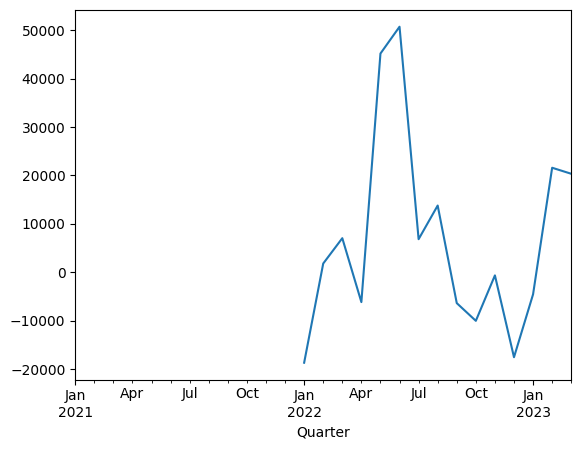

In [24]:
df['Seasonal First Difference'].plot()

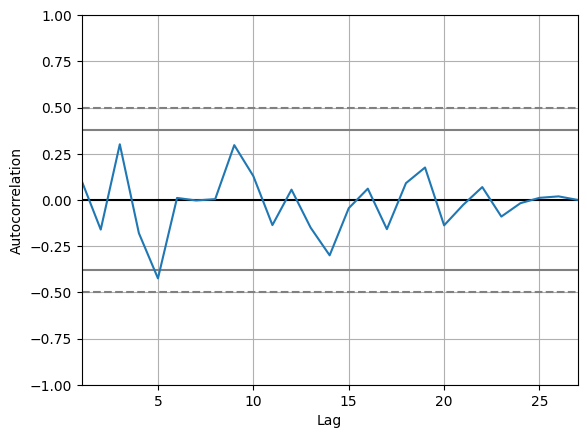

In [25]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Demand'])
plt.show()

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [27]:
import statsmodels.api as sm

C:\Users\Futuremind\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


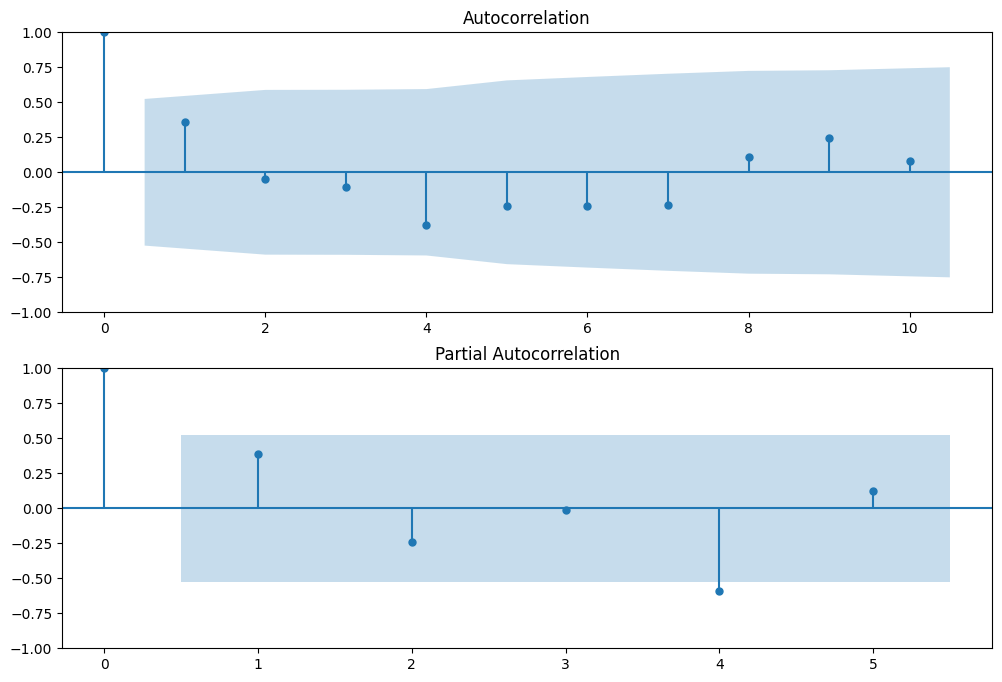

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=5,ax=ax2)

In [29]:
import statsmodels.api as sm

In [30]:
model=sm.tsa.statespace.SARIMAX(df['Demand'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Futuremind\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Futuremind\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Futuremind\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<Axes: xlabel='Quarter'>

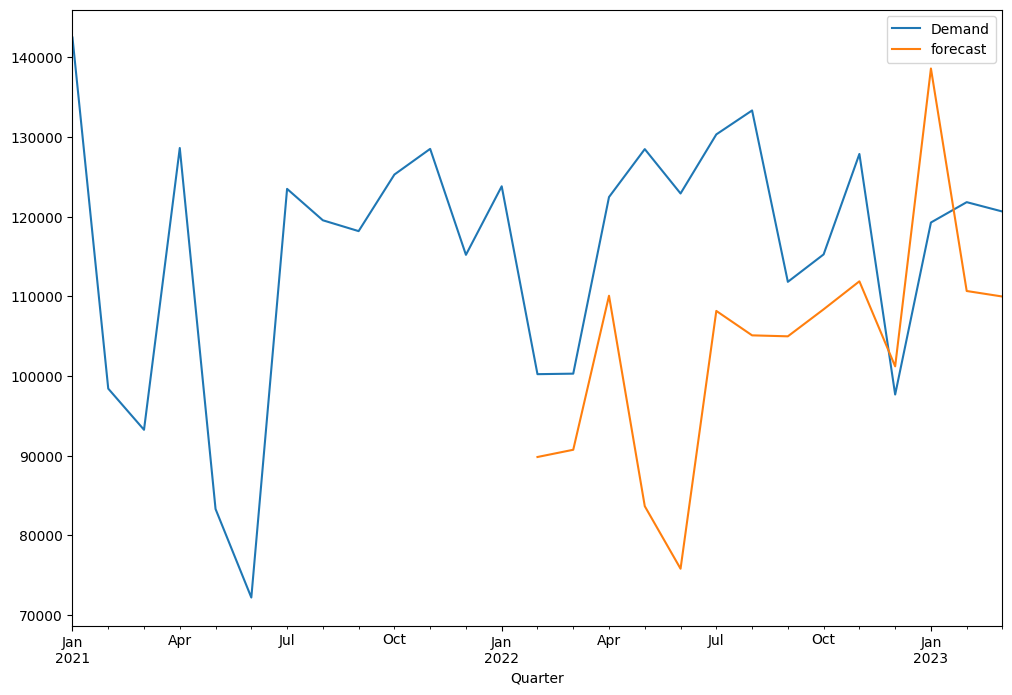

In [28]:
df['forecast']=results.predict(start=13,end=28,dynamic=True)
df[['Demand','forecast']].plot(figsize=(12,8))

In [31]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [32]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [33]:
future_datest_df.tail()

,Demand,Demand First Difference,Seasonal First Difference
2024-10-01,NaN,NaN,NaN
2024-11-01,NaN,NaN,NaN
2024-12-01,NaN,NaN,NaN
2025-01-01,NaN,NaN,NaN
2025-02-01,NaN,NaN,NaN


In [34]:
future_df=pd.concat([df,future_datest_df])

# Prediction forecasting - Capsicum Demand

C:\Users\Futuremind\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: >

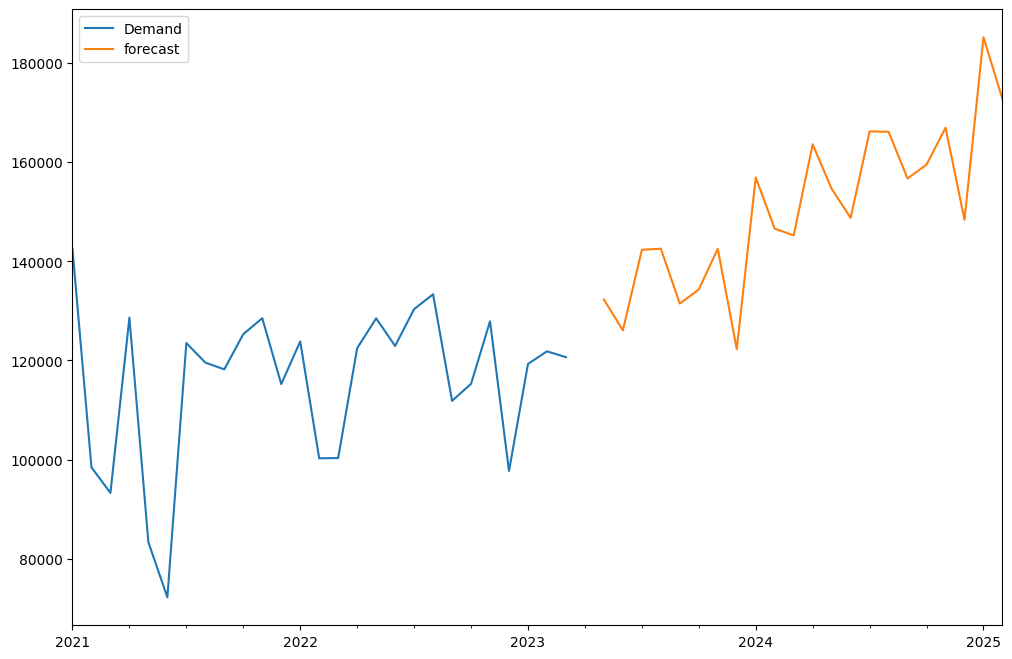

In [35]:
future_df['forecast'] = results.predict(start = 28, end = 50, dynamic= True)  
future_df[['Demand', 'forecast']].plot(figsize=(12, 8)) 